In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
face=cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")

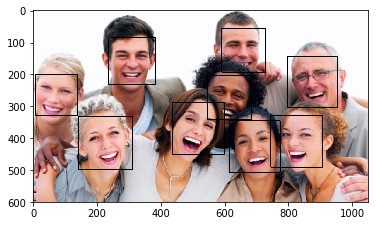

In [22]:
img=cv2.imread("happy.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
faces=face.detectMultiScale(img,1.1,5)
for x,y,w,h in faces:
    cv2.rectangle(img,(x,y),(x+h,y+w),(0,0,0),2)
plt.imshow(img)

# Face Detection using web CAM

In [23]:
cam=cv2.VideoCapture(0)
while True:
    ret,frame=cam.read()
    if ret==False:
        continue
    
    faces=face.detectMultiScale(frame,1.1,5)
    for x,y,w,h in faces:
        cv2.rectangle(frame,(x,y),(x+h,y+w),(0,0,0),2)
    
    cv2.imshow("Face",frame)
    
    key_pressed=cv2.waitKey(1)&0xff
    if(key_pressed==ord('q')):
        break
        
cam.release()
cv2.destroyAllWindows()

# Face Recognition using KNN

## Data collection 

In [24]:
!mkdir data

In [26]:
directory="./data/"


In [61]:
cam=cv2.VideoCapture(0)

In [34]:
my_data=[]
skip=0
offset=5
while True:
    ret,frame=cam.read()
    if ret==False:
        continue
    
    
    faces=face.detectMultiScale(frame,1.1,5)
    
    if(len(faces)>0):
        faces=sorted(faces,key=lambda x:x[2]*x[3],reverse=True)[0]
        x,y,w,h=faces
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,0),3)
        face_region=frame[y-offset:y+h+offset,x-offset:x+w+offset]
        face_region=cv2.resize(face_region,(100,100))
        
        if(skip%10==0):
              my_data.append(face_region)
        skip+=1
        cv2.imshow("face",face_region)
    cv2.imshow("frame",frame)
    key_pressed=cv2.waitKey(1)&0xff
    if(key_pressed==ord('q')):
        break
cam.release()
cv2.destroyAllWindows()

In [39]:
my_data=np.array(my_data)
my_data=my_data.reshape((-1,30000))

In [43]:
np.save(directory+"Ashutosh.npy",my_data)

## Load Data and use KNN for detection

In [4]:
import os

In [5]:
names={}
data=[]
label=[]

In [6]:
files=os.listdir('./data/')
for i in range(len(files)):
    temp=np.load('./data/'+files[i])
    data.append(temp)
    print(temp.shape)
    l=i*np.ones((temp.shape[0],))
    label.append(l)
    
    names[i]=files[i][:-4]

(7, 30000)
(8, 30000)


In [7]:
X = np.concatenate(data, axis = 0)
Y = np.concatenate(label, axis = 0).reshape(-1, 1)

In [8]:
def Knn(X,Y,X_co,k=5):
    dist=[]
    length=X.shape[0]
    
    distance=np.sqrt(np.sum((X-X_co)**2,axis=1))
    dist=list(zip(distance,Y))
    
    dist=sorted(dist)[:k]
    labels=np.array(dist)[:,-1]
    
    ans,cnt=np.unique(labels,return_counts=True)
    return ans[np.argmax(cnt)]

In [11]:
cam=cv2.VideoCapture(0)
while True:
    ret , frame = cam.read()
    
    if ret == False:
        continue
        
    faces = face.detectMultiScale(frame, 1.5, 5)
    
    if len(faces)>0:
        
        for x,y,w,h in faces:
            frame = cv2.rectangle(frame, (x, y), (x+w,y+h), (255,255,255), 2)

            offset = 5
            face_section = frame[y-offset: y+h+offset , x- offset : x+w+ offset]
            face_section = cv2.resize(face_section, (100,100))
            face_section = face_section.reshape(1, 30000)
            pred = Knn(X, Y, face_section)
            name = names[int(pred)]
            
            cv2.putText(frame, name, (x, y-10), cv2.LINE_AA, 2, (255,0,0), 2 )
    cv2.imshow("Face Detection", frame)

    
    key_pressed = cv2.waitKey(1) & 0xFF
    if key_pressed == ord('q'):
        break
    
cam.release()
cv2.destroyAllWindows()